# EDA notebook
## Parkrun capstone project

### Analysis of final clean dataset used for modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
athlete_data = '../../../../../capstone_data/data_all/athlete_dict.csv'
event_data = '../../../../../capstone_data/data_all/event_dict.csv'
eda_data_02_filename = '../../../../../capstone_data/data_all/eda_data_02.csv'

In [4]:
data = pd.read_csv(eda_data_02_filename, index_col=0, parse_dates=['date'], dayfirst=True)

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447411 entries, 0 to 2447410
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   event_index      float64       
 1   event_no         float64       
 2   date             datetime64[ns]
 3   positions        float64       
 4   athlete_no       float64       
 5   total_parkruns   float64       
 6   run_time         float64       
 7   event_PB         float64       
 8   in_club          float64       
 9   age_groups       object        
 10  age_grades       float64       
 11  is_PB            int64         
 12  month            int64         
 13  count_finishers  int64         
 14  season           int64         
 15  med_course_time  float64       
 16  med_event_time   float64       
dtypes: datetime64[ns](1), float64(11), int64(4), object(1)
memory usage: 336.1+ MB


In [4]:
data.head()

,event_index,event_no,date,positions,athlete_no,total_parkruns,run_time,event_PB,in_club,age_groups,age_grades,is_PB,month,count_finishers,season,med_course_time,med_event_time
0,0.0,226.0,2016-05-14,1.0,385667.0,156.0,1134.0,1088.0,0.0,SM25-29,68.25,0,5,128,1,1664.0,1646.0
1,0.0,226.0,2016-05-14,4.0,24573.0,108.0,1168.0,1168.0,1.0,VM35-39,68.58,1,5,128,1,1664.0,1646.0
2,0.0,226.0,2016-05-14,5.0,279321.0,139.0,1171.0,1160.0,1.0,SM30-34,66.27,0,5,128,1,1664.0,1646.0
3,0.0,226.0,2016-05-14,6.0,343501.0,208.0,1174.0,1174.0,1.0,VM45-49,74.19,1,5,128,1,1664.0,1646.0
4,0.0,226.0,2016-05-14,7.0,204322.0,212.0,1188.0,1144.0,1.0,SM30-34,65.49,0,5,128,1,1664.0,1646.0


In [9]:
print('First date:', data.date.min().date())
print('Last date:', data.date.max().date())
print('Number of run dates:', len(data.date.unique()))

First date: 2016-05-14
Last date: 2020-03-14
Number of run dates: 209


In [10]:
print('Number of unique participants:', len(data.athlete_no.unique()))
print('Number of finishes recorded:', len(data.run_time))

Number of unique participants: 269644
Number of finishes recorded: 2447411


In [15]:
print('Describe finish times (minutes):')
data.run_time.describe()/60

Describe finish times (minutes):


count    40790.183333
mean        28.197820
std          6.418612
min         13.950000
25%         23.733333
50%         27.216667
75%         31.333333
max        110.183333
Name: run_time, dtype: float64

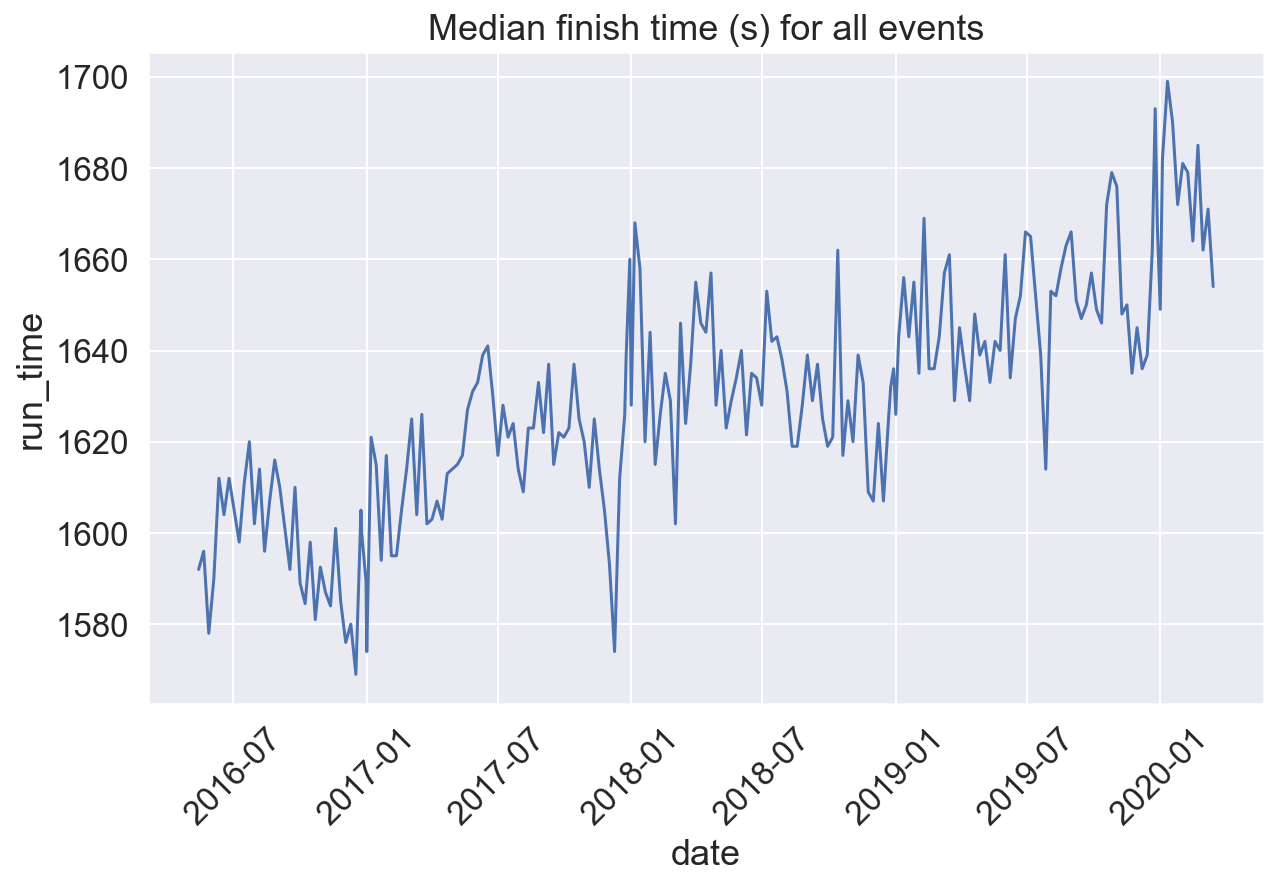

In [24]:
time_median = data.groupby('date')['run_time'].median()
plt.figure(figsize=(10,6))
sns.lineplot(data=time_median)
plt.title('Median finish time (s) for all events')
plt.xticks(rotation=45)
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447411 entries, 0 to 2447410
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   event_index      float64       
 1   event_no         float64       
 2   date             datetime64[ns]
 3   positions        float64       
 4   athlete_no       float64       
 5   total_parkruns   float64       
 6   run_time         float64       
 7   event_PB         float64       
 8   in_club          float64       
 9   age_groups       object        
 10  age_grades       float64       
 11  is_PB            int64         
 12  month            int64         
 13  count_finishers  int64         
 14  season           int64         
 15  med_course_time  float64       
 16  med_event_time   float64       
dtypes: datetime64[ns](1), float64(11), int64(4), object(1)
memory usage: 336.1+ MB


In [17]:
# Check categorical and continuous features
regression_cols = ['event_index', 'positions',
       'total_parkruns', 'event_PB', 'in_club', 'age_groups',
       'month', 'count_finishers', 'season',
       'med_course_time']
regression_cat_cols = ['event_index','in_club', 'age_groups', 'month', 'season']
regression_excluded = ['event_no', 'date', 'athlete_no', 'age_grades', 'is_PB', 'med_event_time']
target_col = ['run_time']

In [18]:
regression_cont_cols = [x for x in regression_cols if x not in regression_cat_cols]

In [19]:
regression_cont_cols

['positions',
 'total_parkruns',
 'event_PB',
 'count_finishers',
 'med_course_time']

<Figure size 720x720 with 0 Axes>

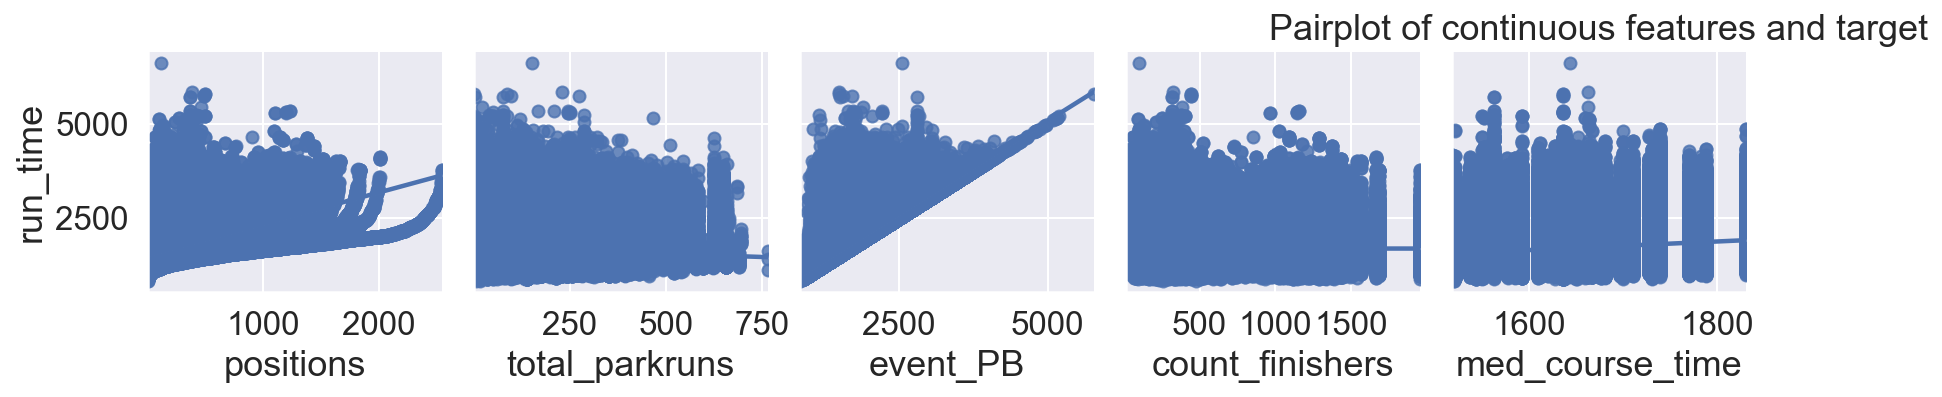

In [33]:
pair_cols = regression_cont_cols + target_col
plt.figure(figsize=(10,10))
sns.pairplot(data[pair_cols], x_vars=regression_cont_cols, y_vars=target_col, kind='reg')
plt.suptitle('Pairplot of continuous features and target')
plt.show()

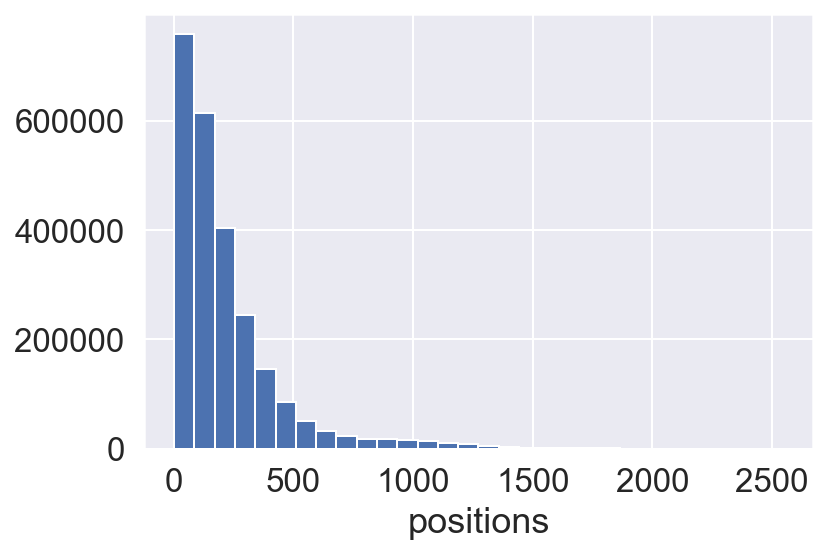

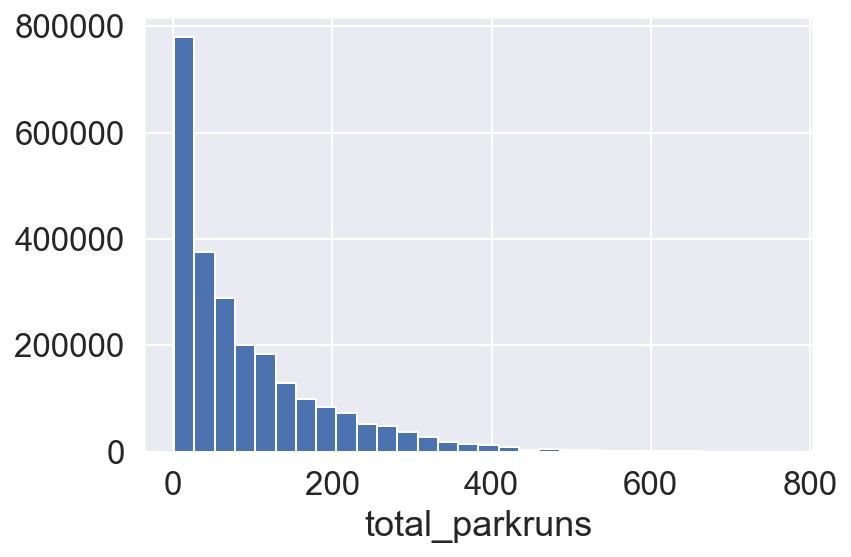

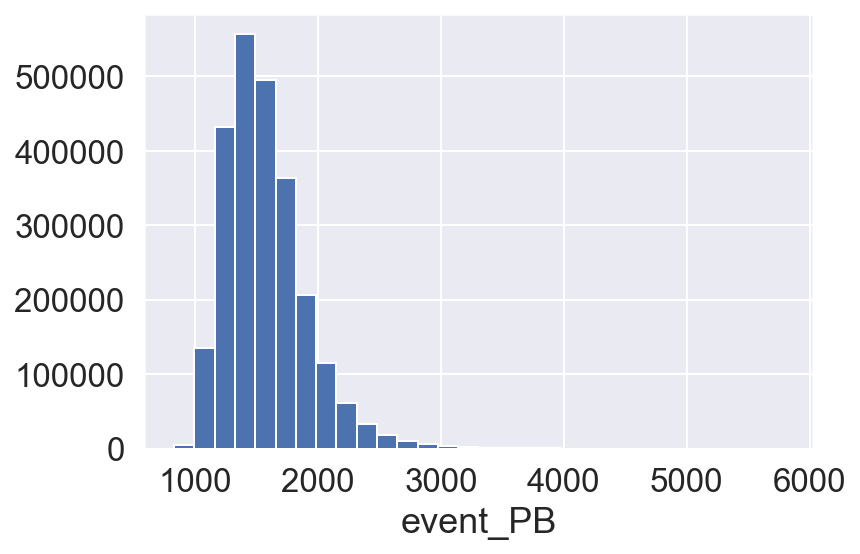

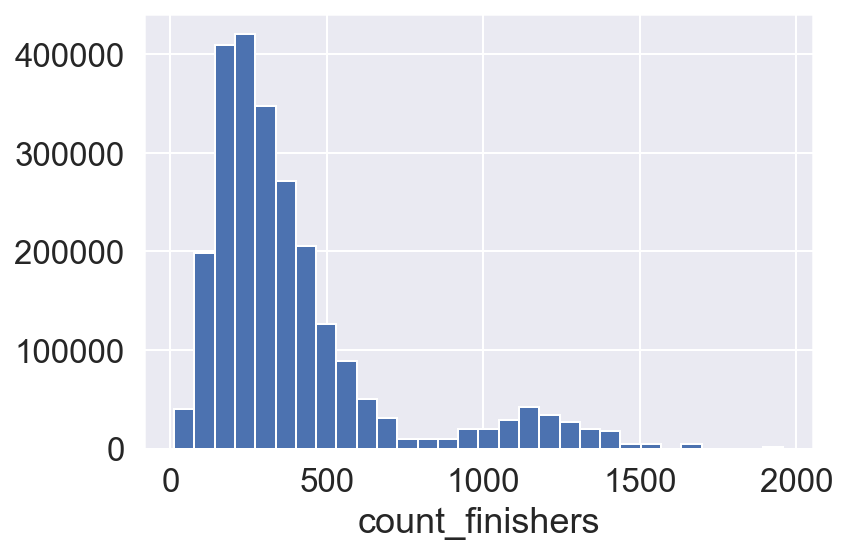

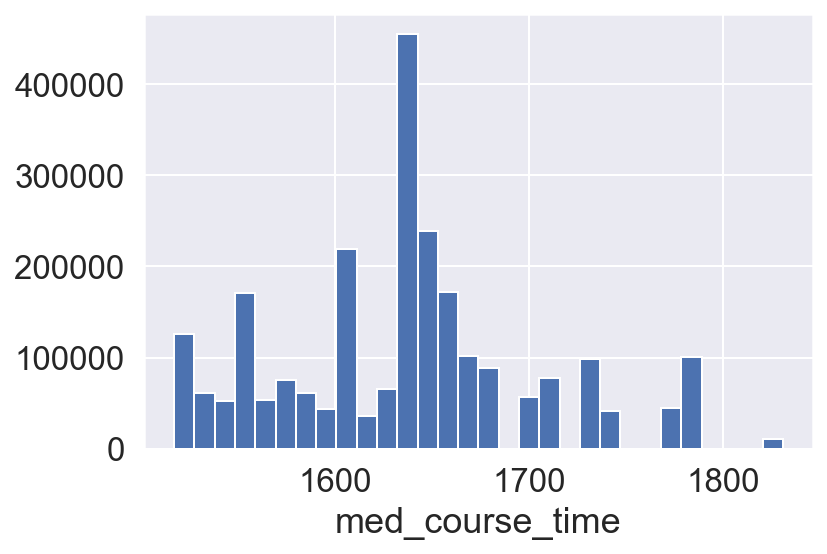

In [47]:
# plot distribution of continuous features
for i, col in enumerate(regression_cont_cols):
    plt.hist(data[col], bins=30)
    plt.xlabel(col)
    plt.show()

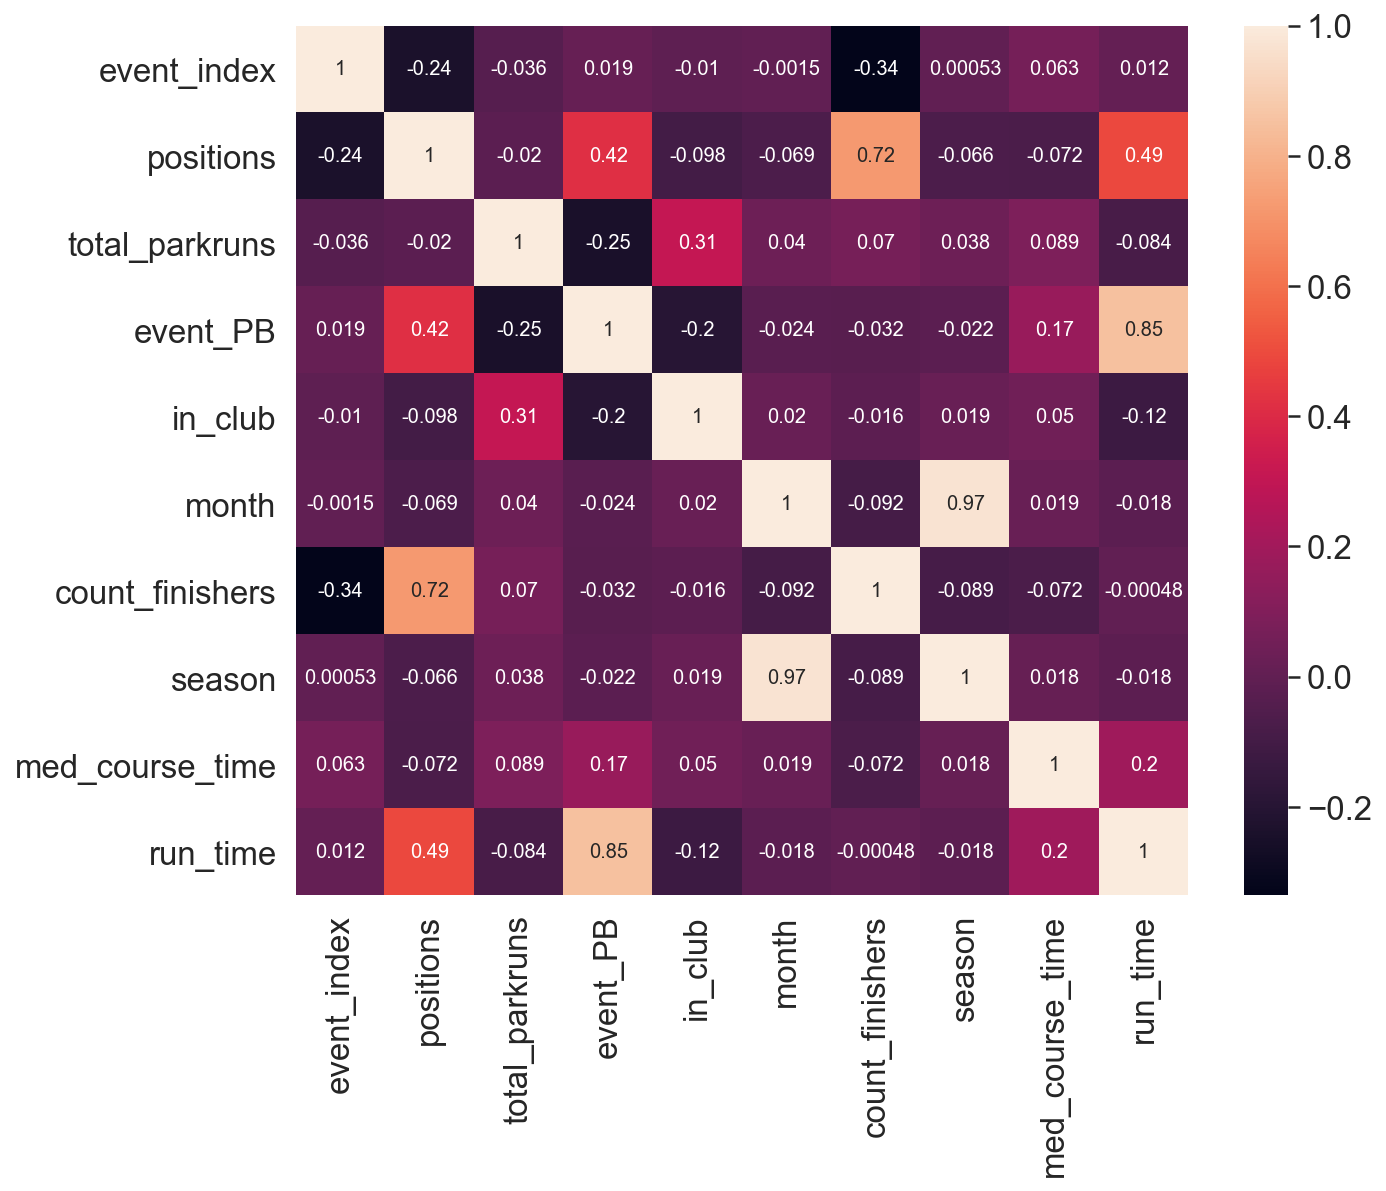

In [49]:
# Check correlation heatmap
corr_cols = regression_cols + target_col
plt.figure(figsize=(10,8))
sns.heatmap(data[corr_cols].corr(), annot=True)
plt.show()

### Correlation heatmap

- The strongest correlations with the target variable (run_time) are with finish position and previous event personal best, with the median course time and whether the runner is a member of club also of interest.
- Features showing collinearity include finish position with the number of finishers as well as previous personal best, and total parkruns with personal best and being a member of a club.
- Month and season are strongly correlated as expected.

- No real cause for concern, although regularisation may be required when modelling.

### Categorical feature analysis

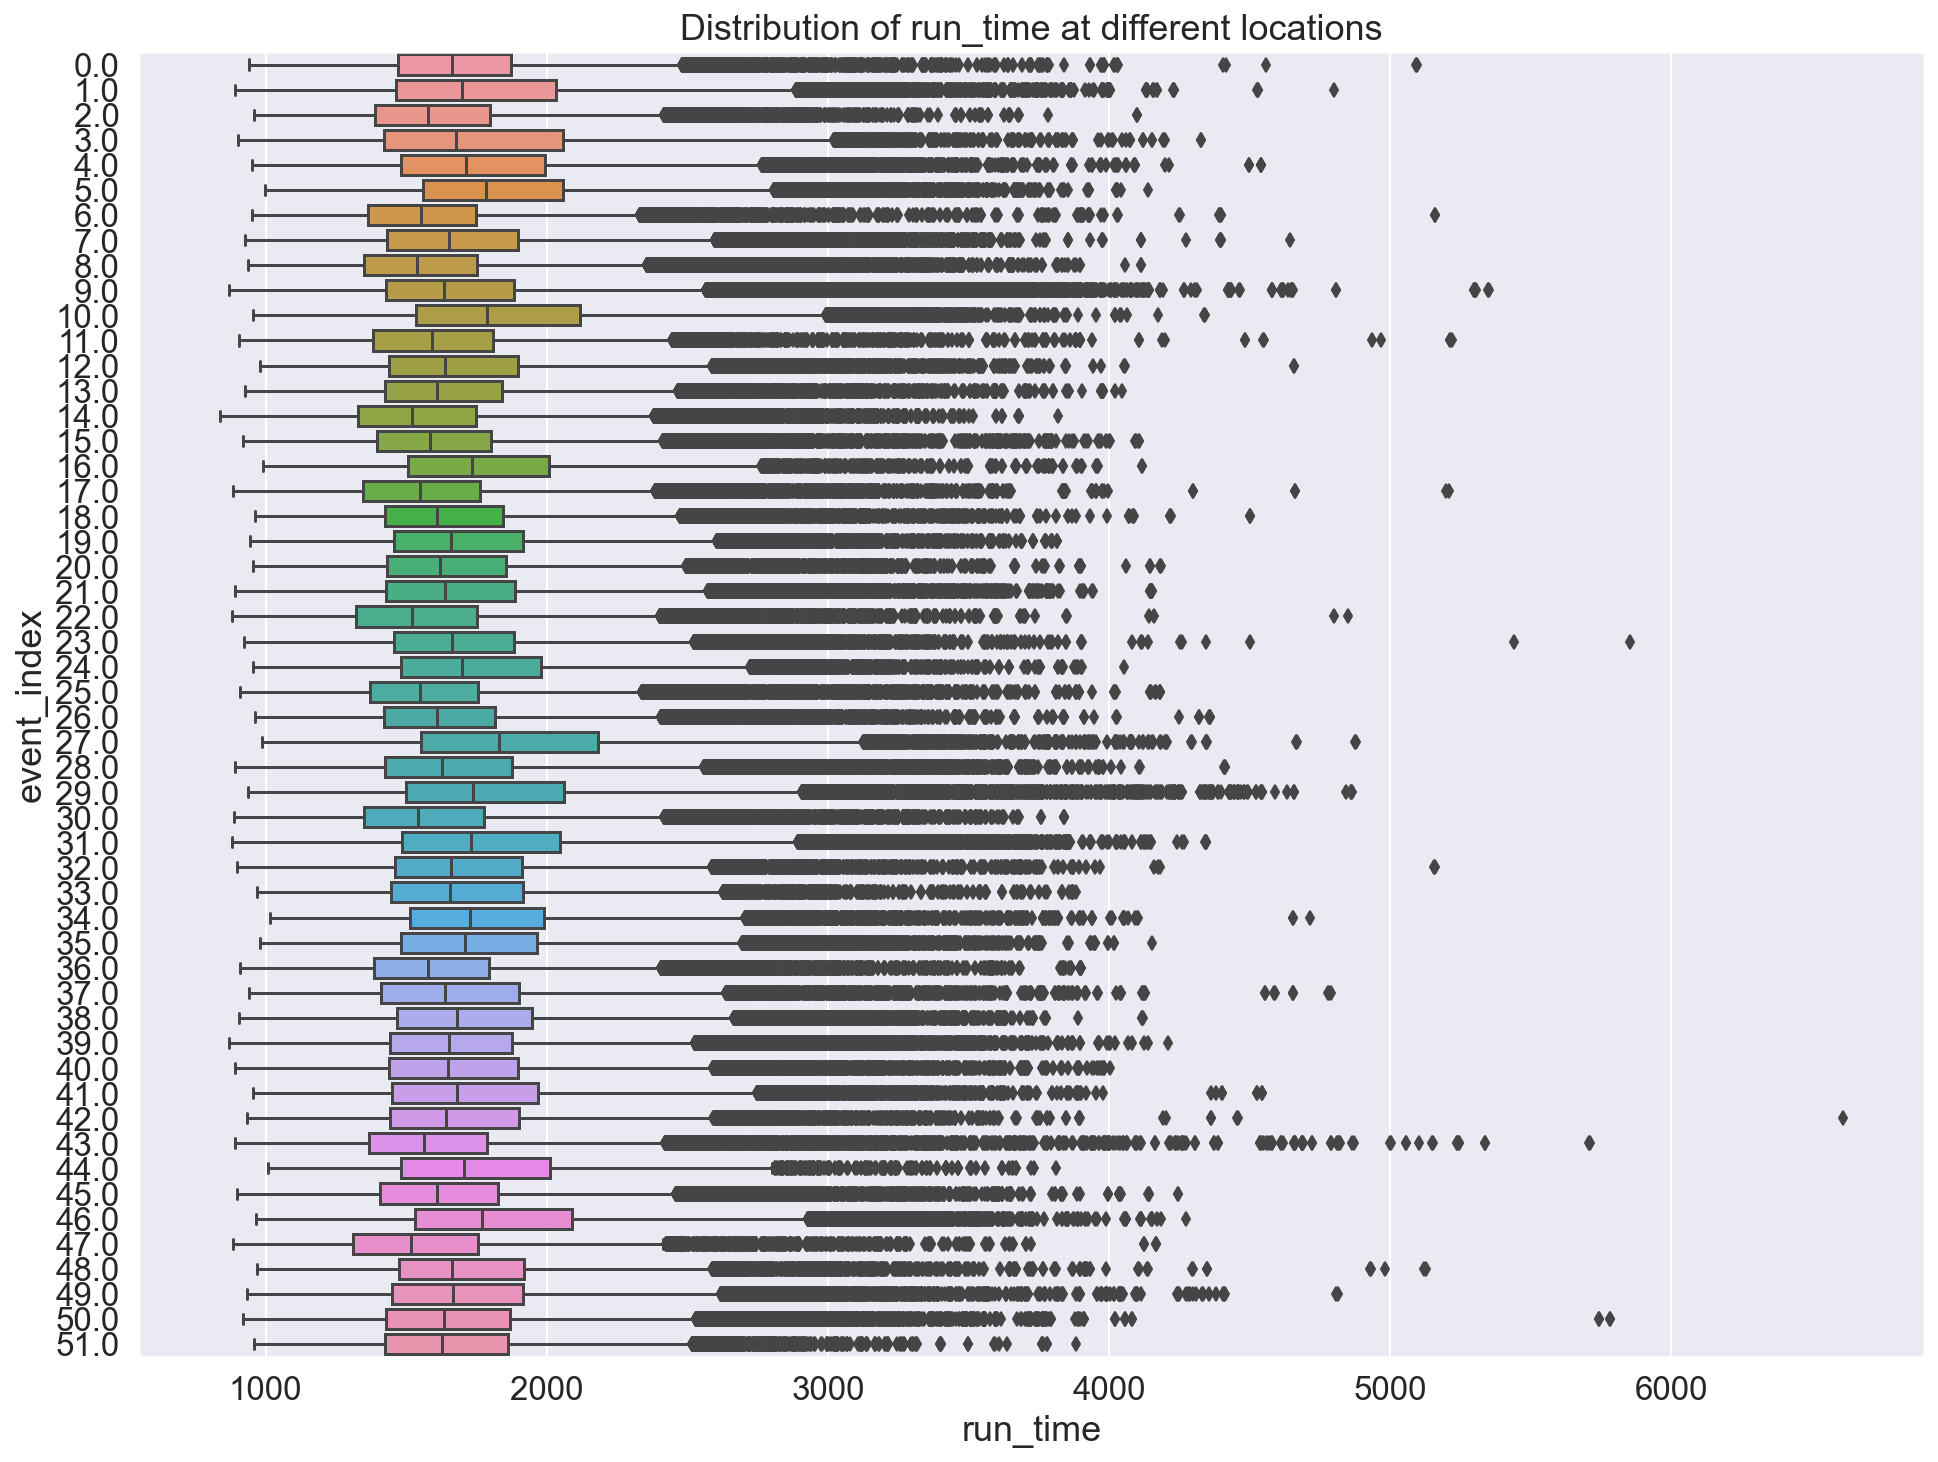

In [5]:
plt.figure(figsize=(16,12))
plt.title('Distribution of run_time at different locations')
sns.boxplot(y=data.event_index, x=data.run_time, orient='h');

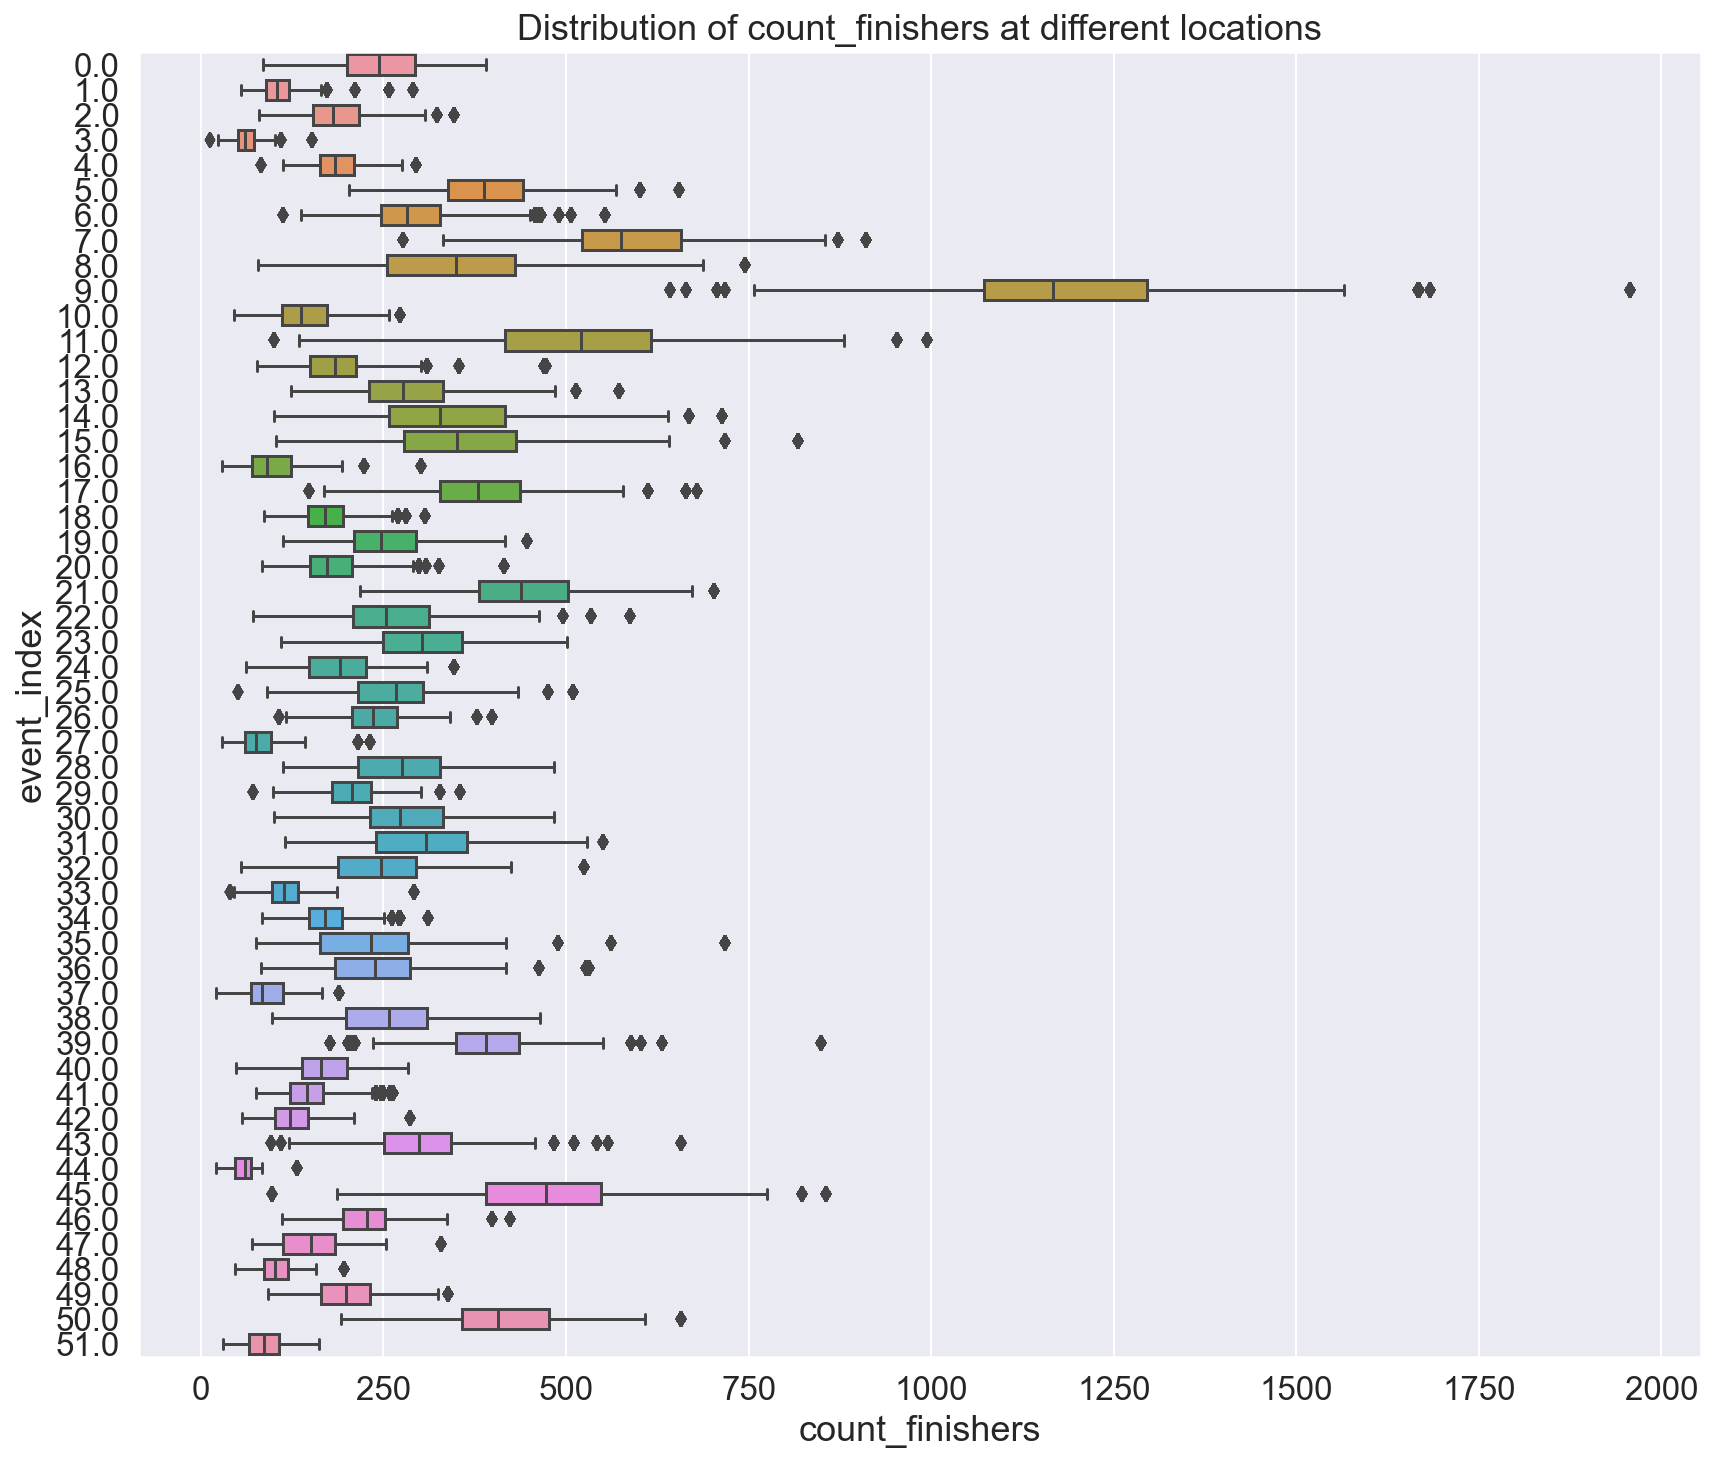

In [9]:
plt.figure(figsize=(14,12))
plt.title('Distribution of count_finishers at different locations')
plt.xlabel('count_finishers')
sns.boxplot(y=data.event_index, x=data.count_finishers, orient='h');

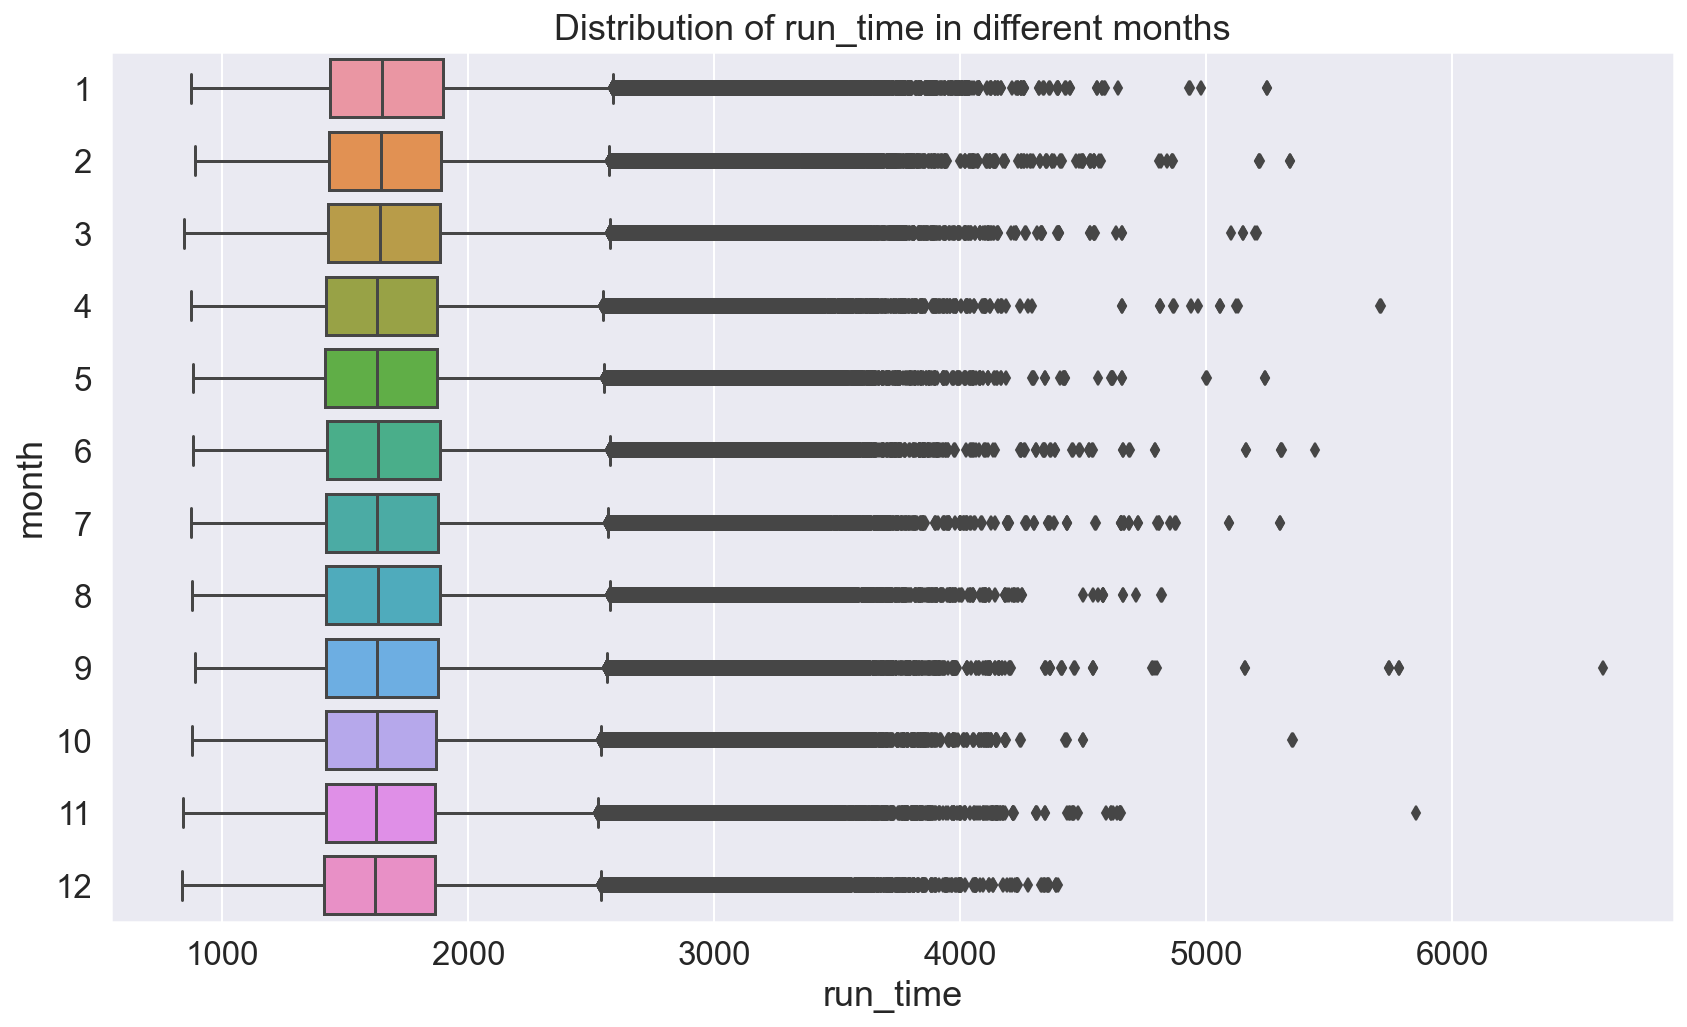

In [16]:
plt.figure(figsize=(14,8))
plt.title('Distribution of run_time in different months')
plt.xlabel('run_time')
sns.boxplot(y=data.month, x=data.run_time, orient='h');

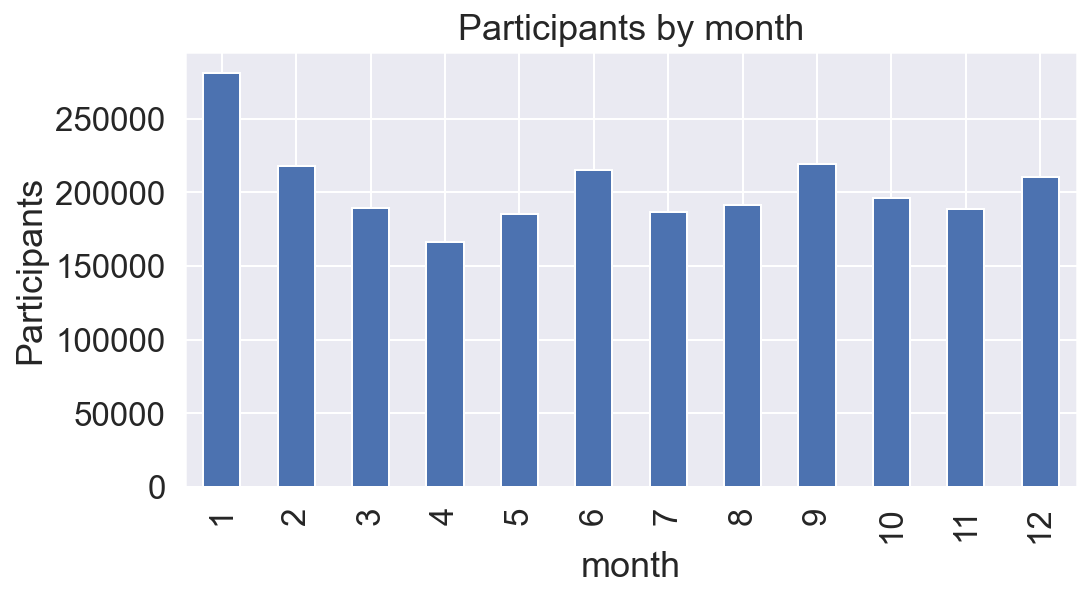

In [51]:
plt.figure(figsize=(8,4))
plt.title('Participants by month')
plt.ylabel('Participants')
data.groupby('month')['run_time'].count().plot(kind='bar')
plt.show()

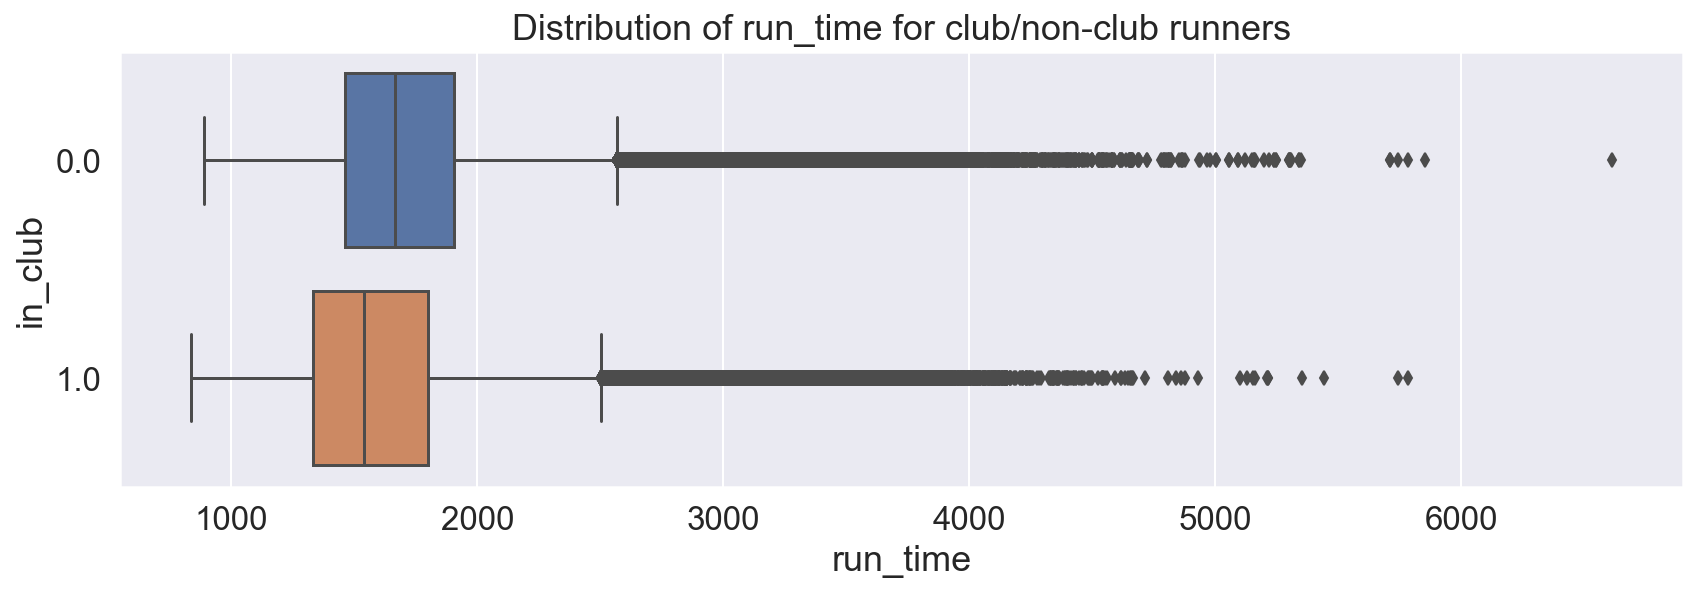

In [21]:
plt.figure(figsize=(14,4))
plt.title('Distribution of run_time for club/non-club runners')
plt.xlabel('run_time')
sns.boxplot(y=data.in_club, x=data.run_time, orient='h');

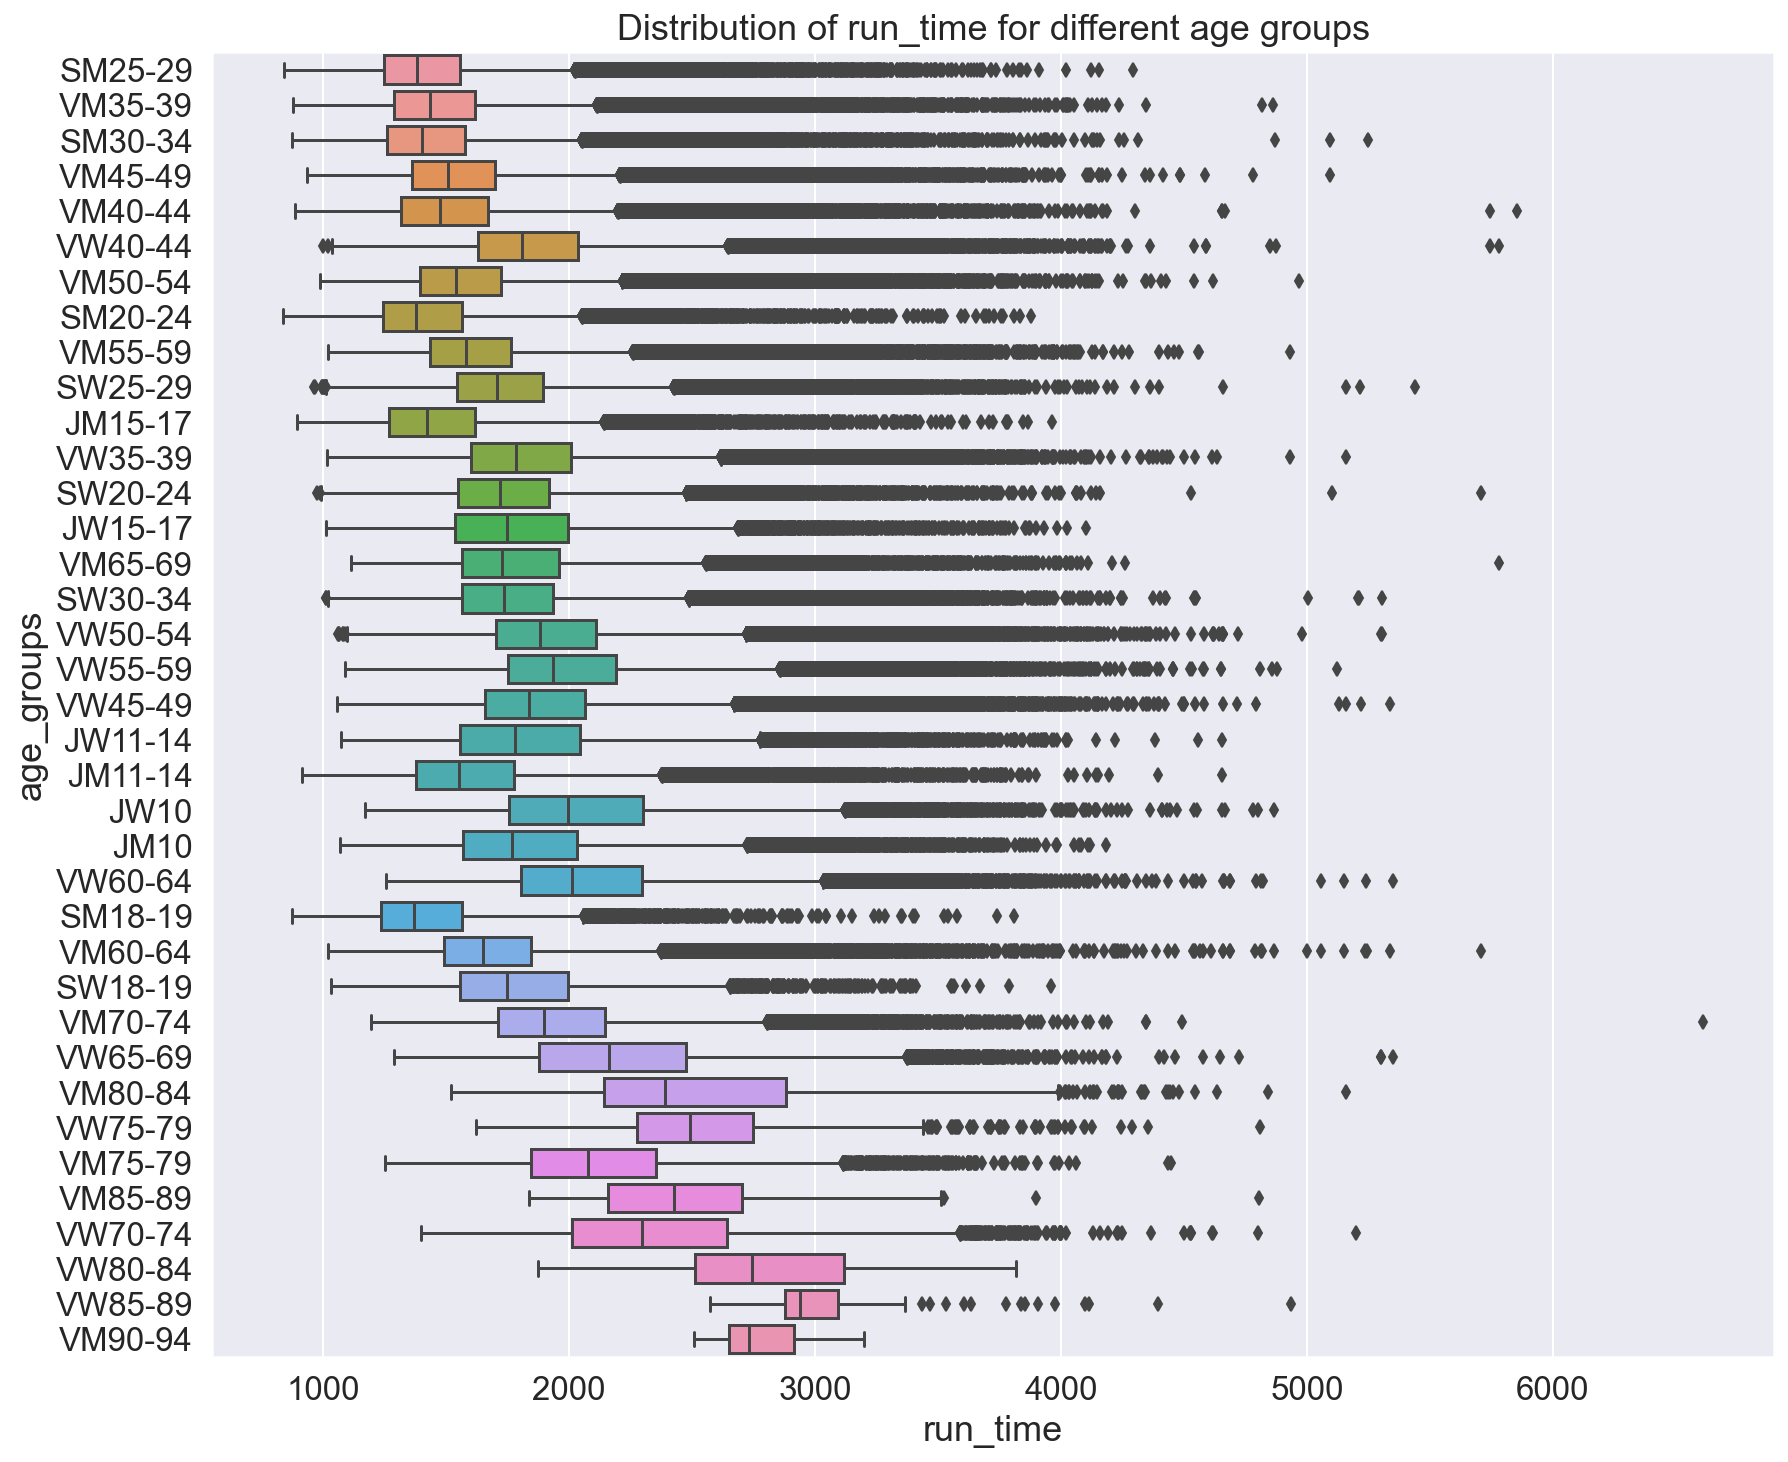

In [22]:
plt.figure(figsize=(14,12))
plt.title('Distribution of run_time for different age groups')
plt.xlabel('run_time')
sns.boxplot(y=data.age_groups, x=data.run_time, orient='h');

- There is less variation in the distribution of run_time across different events and in different months than I had expected.
- The number of participants varies significantly across the different events so it will be interesting to see how models pick up these features.
- Similarly the number of participants varies across different months more than run_time.
- There is a clear separation of club vs non-club runners
- As expected there is a strong variation in run_time across age and gender groups.

- We see the strong skew in run_time which we will look at further.

### Target - run_time

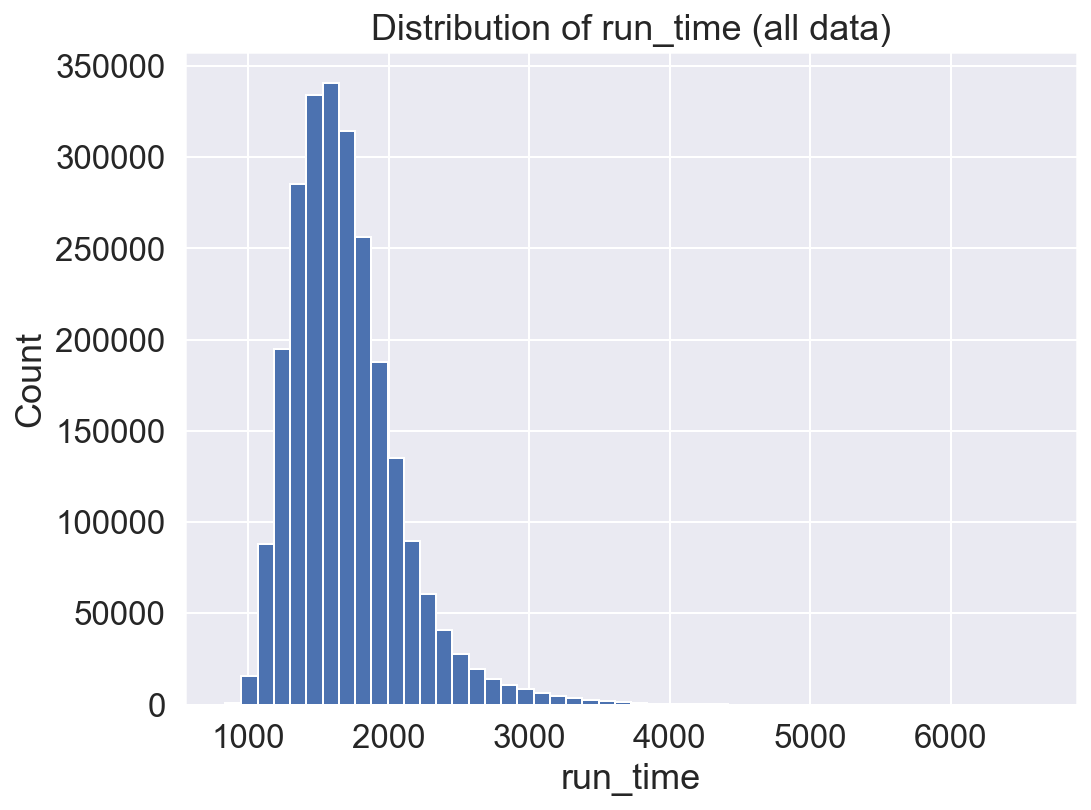

In [24]:
plt.figure(figsize=(8,6))
plt.title('Distribution of run_time (all data)')
plt.xlabel('run_time')
plt.ylabel('Count')
data.run_time.hist(bins=50)
plt.show()

- The target variable is strongly right skewed. I will perform a log transform to bring this closer to a normal distribution and use the transformed variable for modelling

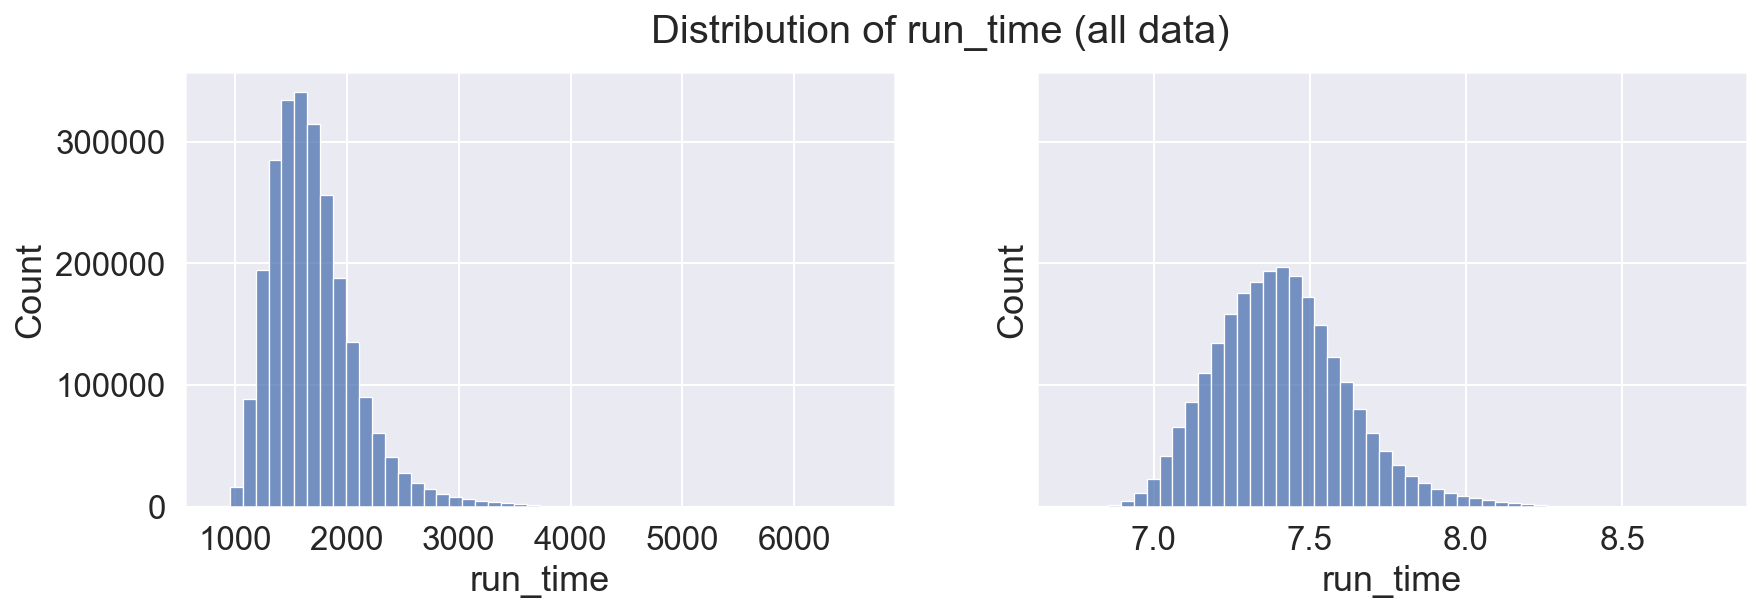

In [50]:
fig, ax = plt.subplots(1,2, figsize=(14,4), sharey=True)
plt.suptitle('Distribution of run_time (all data)', fontsize=20)
plt.ylabel('Count')
sns.histplot(x=data.run_time, bins=50, ax=ax[0])
sns.histplot(x=np.log(data.run_time), bins=50, ax=ax[1])
plt.show()

### Other feature transformations

- I will also apply log transform to two feature variables with strong skew
    - positions
    - event_PB

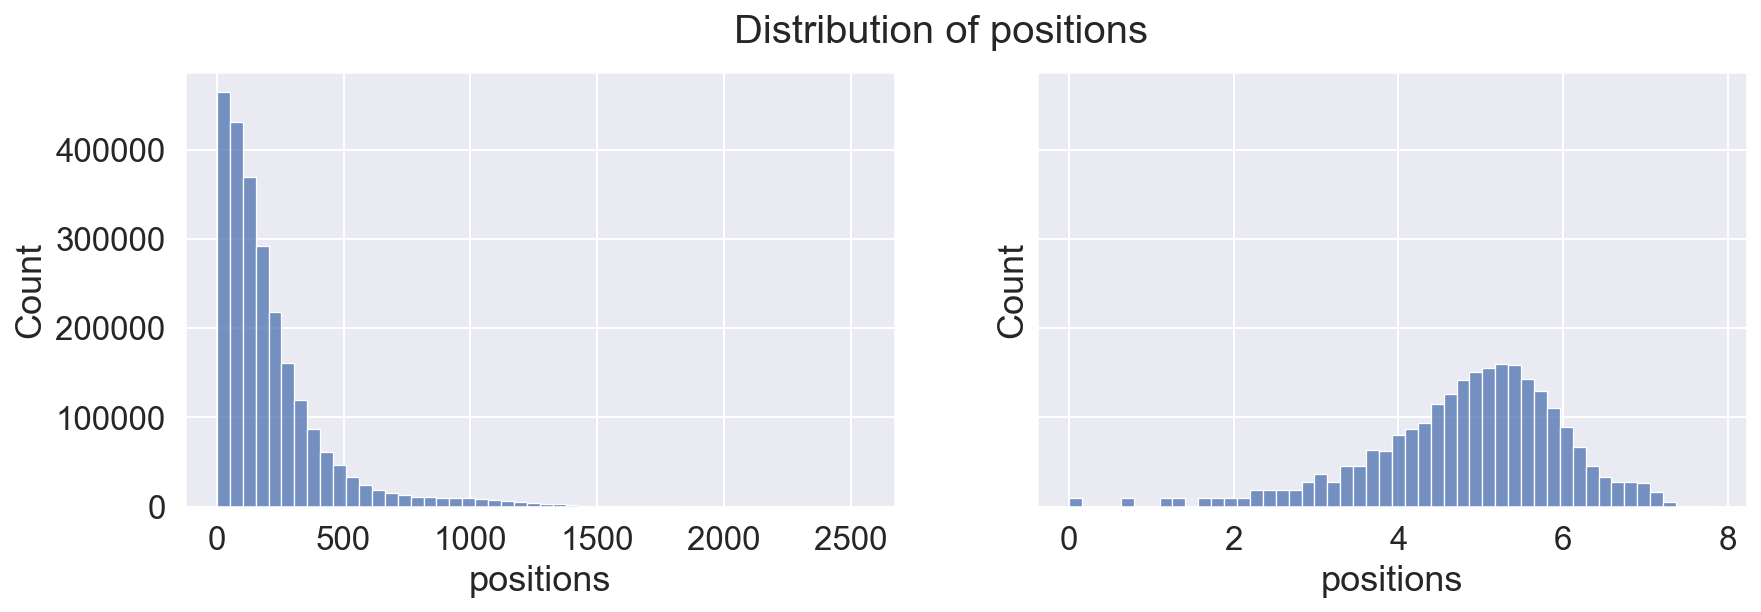

In [52]:
fig, ax = plt.subplots(1,2, figsize=(14,4), sharey=True)
plt.suptitle('Distribution of positions', fontsize=20)
plt.ylabel('Count')
sns.histplot(x=data.positions, bins=50, ax=ax[0])
sns.histplot(x=np.log(data.positions), bins=50, ax=ax[1])
plt.show()

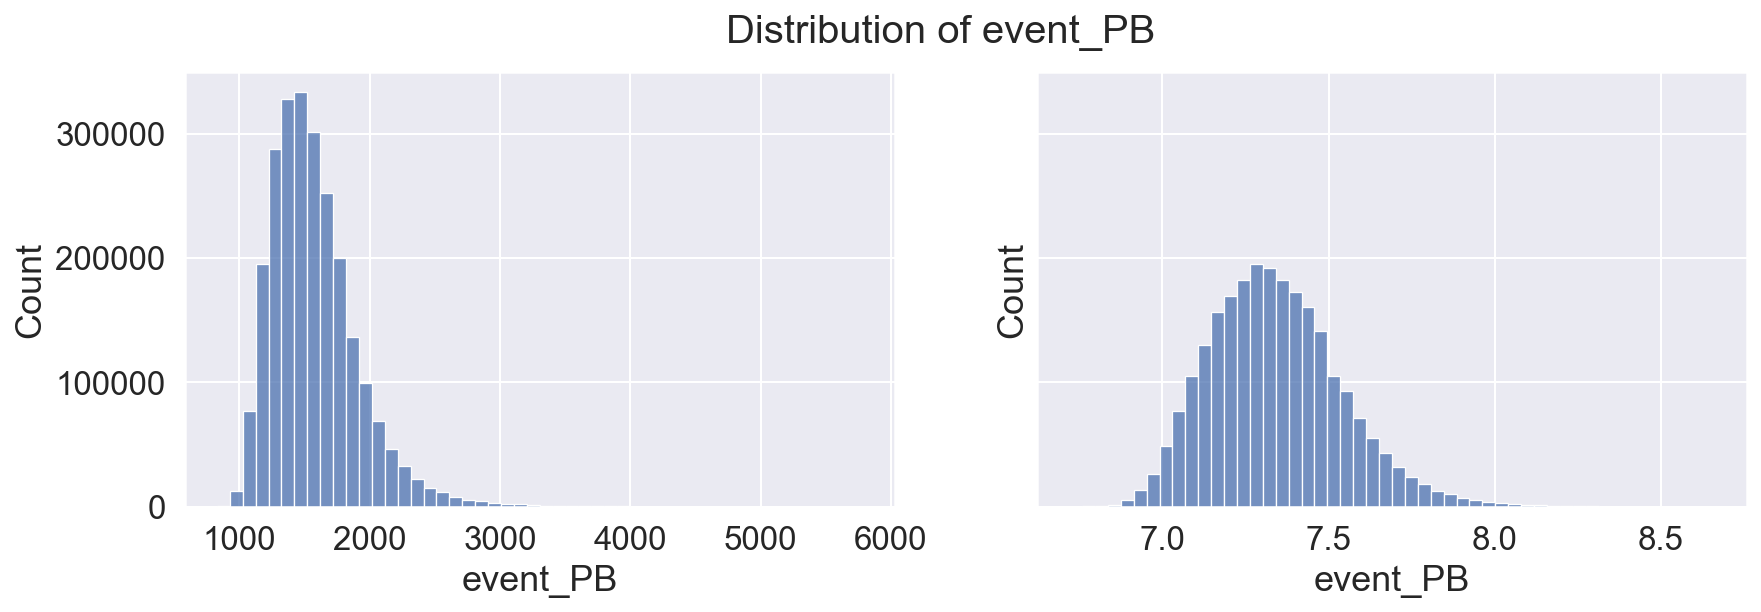

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14,4), sharey=True)
plt.suptitle('Distribution of event_PB', fontsize=20)
plt.ylabel('Count')
sns.histplot(x=data.event_PB, bins=50, ax=ax[0])
sns.histplot(x=np.log(data.event_PB), bins=50, ax=ax[1])
plt.show()

### An example event

- It is interesting to see examples of all participant finish times for individual events as the aim is to predict all of these successfully.

In [54]:
data.date.max()

Timestamp('2020-03-14 00:00:00')

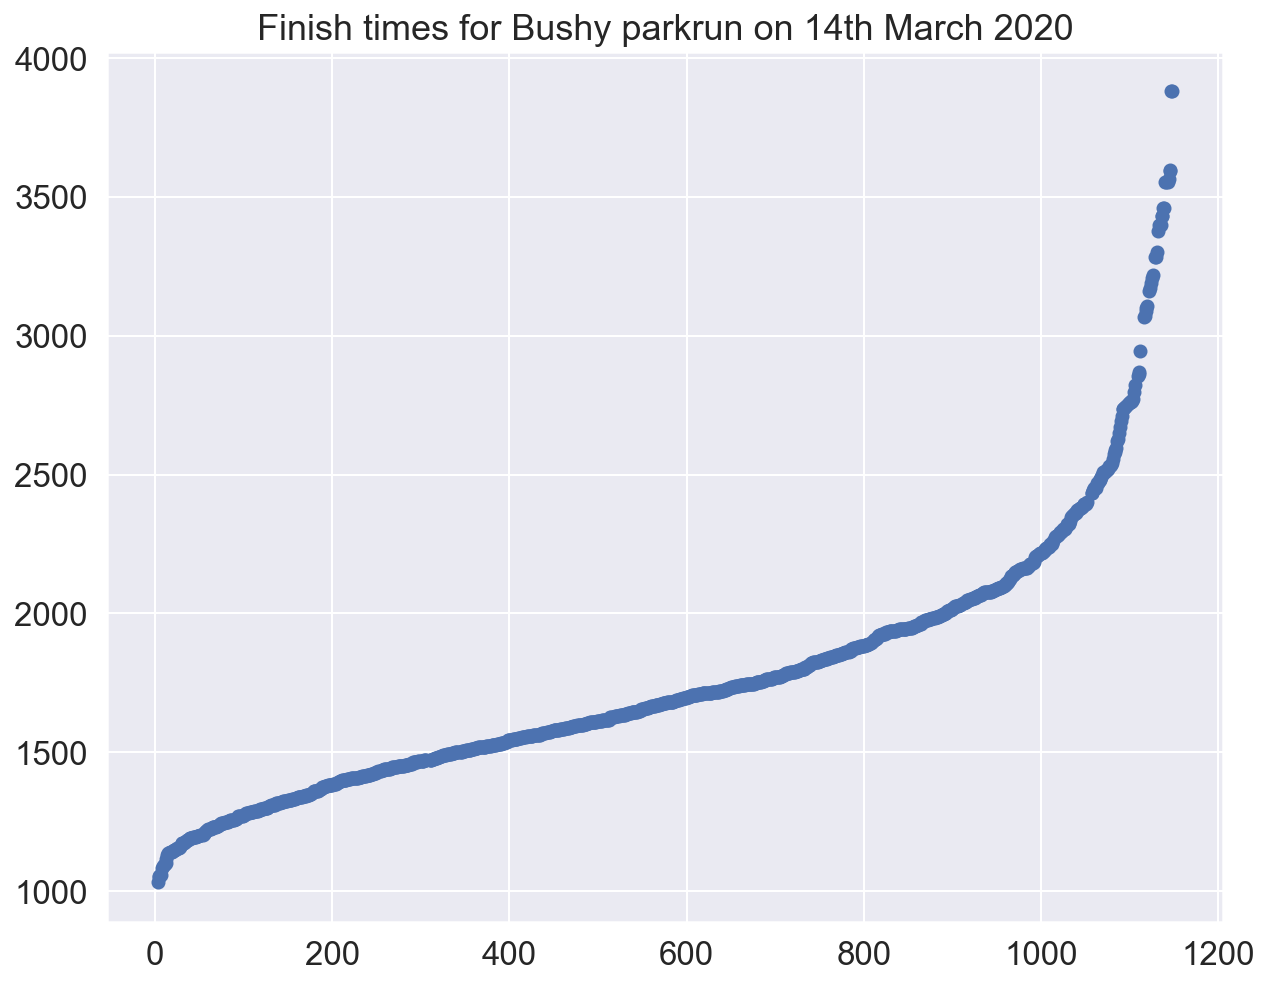

In [60]:
bushy_latest = data[(data.event_index == 9) & (data.date == data.date.max())][['positions', 'run_time']]

plt.figure(figsize=(10,8))
plt.title('Finish times for Bushy parkrun on 14th March 2020')
plt.scatter(x=bushy_latest.positions, y=bushy_latest.run_time)
plt.show()

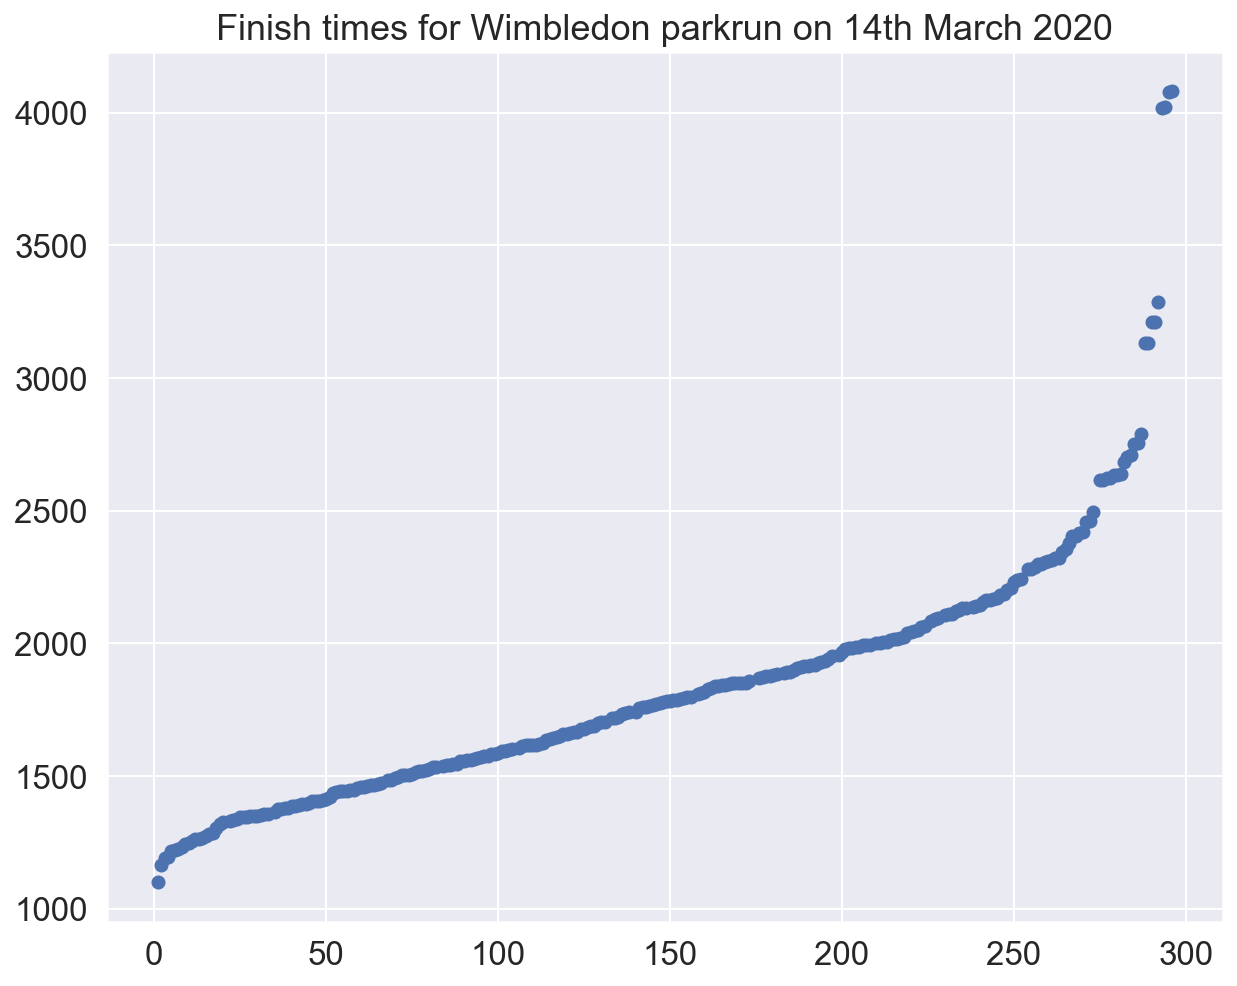

In [61]:
wimbledon_latest = data[(data.event_index == 50) & (data.date == data.date.max())][['positions', 'run_time']]

plt.figure(figsize=(10,8))
plt.title('Finish times for Wimbledon parkrun on 14th March 2020')
plt.scatter(x=wimbledon_latest.positions, y=wimbledon_latest.run_time)
plt.show()

- There is a linear region in the centre which we hope will be successfully predicted.
- The challenges will be 
    - to capture the change for the fastest and slowest finishers
    - to minimise error for events where conditions have a significant effect on times.